In [1]:
import gym
import lake_envs as lake_env
import time
import numpy as np
from example import *
import pi_vi


In [2]:
def gen_env(env_name):
    env = gym.make(env_name)
    env.seed(0)
    return env


env = gen_env('Deterministic-4x4-FrozenLake-v0')

print_env_info(env)
print_model_info(env, 0, lake_env.DOWN)
print_model_info(env, 1, lake_env.DOWN)
print_model_info(env, 14, lake_env.RIGHT)


Environment has 16 states and 4 actions.
According to transition function, taking action DOWN(1) in state 0 leads to 1 possible outcomes
	Transitioning to non-terminal state 4 with probability 1.000000 and reward 0.000000
According to transition function, taking action DOWN(1) in state 1 leads to 1 possible outcomes
	Transitioning to terminal state 1 with probability 1.000000 and reward 0.000000
According to transition function, taking action RIGHT(2) in state 14 leads to 1 possible outcomes
	Transitioning to non-terminal state 15 with probability 1.000000 and reward 0.000000


## Random Policy

In [3]:
# env = gym.make('Deterministic-4x4-FrozenLake-v0')

# initial_state = env.reset()
# env.render()
# time.sleep(1)  # just pauses so you can see the output

# total_reward = 0
# num_steps = 0
# while True:
#     nextstate, reward, is_terminal, debug_info = env.step(
#         env.action_space.sample())
#     env.render()

#     total_reward += reward
#     num_steps += 1

#     if is_terminal:
#         break

#     time.sleep(1)

# print('Agent received total reward of: %f' % total_reward)
# print('Agent took %d steps' % num_steps)
# total_reward, num_steps


## Syncronous Policy Iteration

In [4]:
init_state = env.reset()
print("init_state: ", init_state)
env.render()
env.P[0][lake_env.RIGHT]
env.P[2]


init_state:  2

FHSF
FGHF
FHHF
FFFF


{0: [(1.0, 1, 0.0, True)],
 1: [(1.0, 6, 0.0, True)],
 2: [(1.0, 3, 0.0, False)],
 3: [(1.0, 2, 0.0, False)]}


FHSF
FGHF
FHHF
FFFF
running policy:  async_ordered
DLRD
RLLD
ULLD
ULLL
Agent took 6 steps

FFFFFSFF
FFFFFFFF
HHHHHHFF
FFFFFFFF
FFFFFFFF
FHFFFHHF
FHFFHFHH
FGFFFFFF
running policy:  async_ordered
DDDDDDDL
RRRRRRDL
LLLLLLDL
DLDLLLLL
DLDLLLLL
DLDLLLLU
DLDLLDLL
RLLLLLLL
Agent took 15 steps


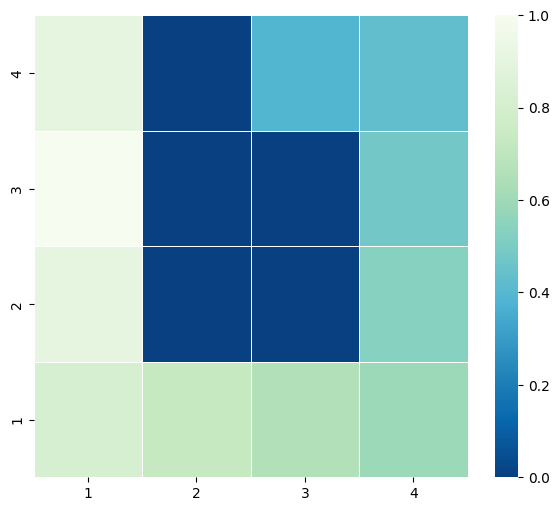

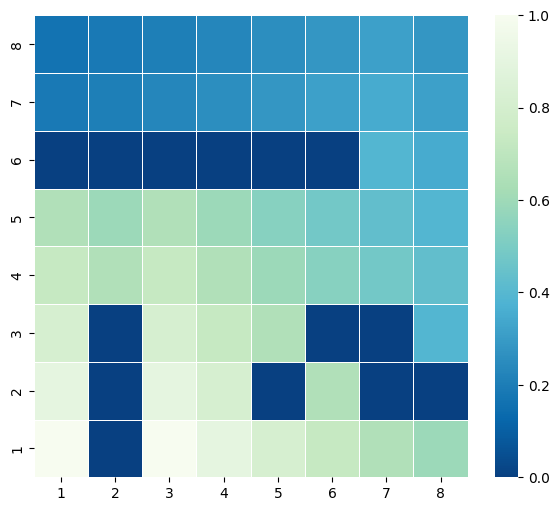

In [5]:
from pi_vi import SYNC, ASYNC_ORDERD, ASYNC_PERM


def run_value_iter_trial(env, policy_type=SYNC):
    initial_state = env.reset()
    env.render()
    time.sleep(1)  # just pauses so you can see the output
    total_reward = 0
    num_steps = 0

    # initialization
    gamma = 0.9
    tol = 1e-3

    print("running policy: ", policy_type)
    if policy_type == SYNC:
        state_value_func, num_steps, policy = pi_vi.value_iteration_sync(
            env, gamma, max_iterations=int(1e3), tol=tol)
    elif policy_type == ASYNC_ORDERD:
        state_value_func, num_steps, policy = pi_vi.value_iteration_async_ordered(
            env, gamma, max_iterations=int(1e3), tol=tol)
    elif policy_type == ASYNC_PERM:
        state_value_func, num_steps, policy = pi_vi.value_iteration_async_randperm(
            env, gamma, max_iterations=int(1e3), tol=tol)
    else:
        raise NotImplemented

    pi_vi.display_policy_letters(env, policy)
    pi_vi.value_func_heatmap(env, state_value_func)
    print('Agent took %d steps' % num_steps)


env_4x4 = gym.make('Deterministic-4x4-FrozenLake-v0')
env_8x8 = gym.make('Deterministic-8x8-FrozenLake-v0')


# run_value_iter_trial(env_4x4, policy_type=SYNC)
# run_value_iter_trial(env_8x8, policy_type=SYNC)

run_value_iter_trial(env_4x4, policy_type=ASYNC_ORDERD)
run_value_iter_trial(env_8x8, policy_type=ASYNC_ORDERD)

# run_value_iter_trial(env_4x4, policy_type=ASYNC_PERM)
# run_value_iter_trial(env_8x8, policy_type=ASYNC_PERM)
